# Linear Regression


In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [91]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [92]:
numerical = df.select_dtypes(include = np.number)


array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'monthly_premium_auto'}>],
       [<Axes: title={'center': 'months_since_last_claim'}>,
        <Axes: title={'center': 'months_since_policy_inception'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>],
       [<Axes: title={'center': 'number_of_policies'}>,
        <Axes: title={'center': 'total_claim_amount'}>, <Axes: >]],
      dtype=object)

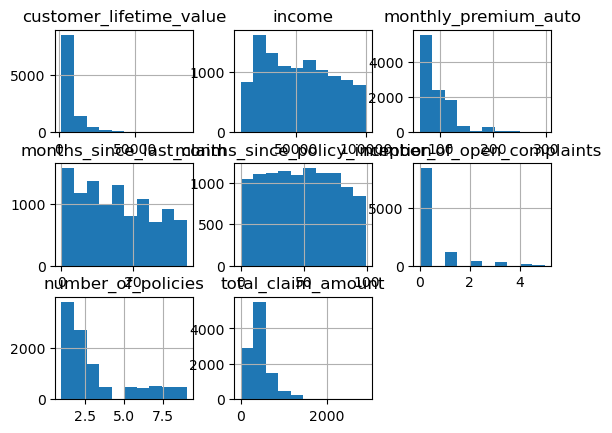

In [93]:
numerical.hist()

In [94]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

### X-y split (y is the target variable, in this case, "total claim amount")

In [95]:
X = numerical[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies']]
y = numerical['total_claim_amount']

### Train-test split

In [96]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


### Standardize the data (after the data split!).

In [98]:
from sklearn.preprocessing import StandardScaler

In [120]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


In [100]:
from sklearn.preprocessing import PowerTransformer

In [115]:
#pt = PowerTransformer(
#yeo_X_train = pt.fit_transform(X_train)
#yeo_X_test = pt.fit_transform(X_test)

In [116]:
#pd.DataFrame(yeo_X_test).hist(bins=60)

# Apply linear regression

In [103]:
from sklearn.linear_model import LinearRegression

In [121]:
lm = LinearRegression() 
model = lm.fit(X_train_std, y_train)

### Model Interpretation

In [105]:
print(model.coef_)
print(model.intercept_)

[ -2.13594719 -36.7201968  161.12276203   3.5527067   -2.03301237
  -1.17714444   1.58807445]
433.3067361668137


In [134]:
X_test_reshaped = X_test_std.reshape(-1,7)

y_test_reshaped = np.array(y_train).reshape(-1,1)

In [135]:
y_pred = model.predict(X_test_reshaped)

In [133]:
print(X_train_std.shape)


(7482, 7)


In [136]:
y_test_reshaped.shape

(7482, 1)

In [138]:
compare = pd.DataFrame({'y_test':list(y_test), 'y_pred':list(y_pred)})

In [141]:
compare

,y_test,y_pred
0,120,227.773252
1,660,557.511266
2,244,337.044844
3,86,272.175231
4,1032,1100.794972
...,...,...
3202,406,541.829678
3203,321,297.834594
3204,45,356.745062
3205,597,588.820099


In [139]:
model.coef_
model.intercept_

431.7756099789201

In [140]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [142]:
mse(y_test,y_pred)

49154.64390326824

In [143]:
mae(y_test, y_pred)

152.83216224246738

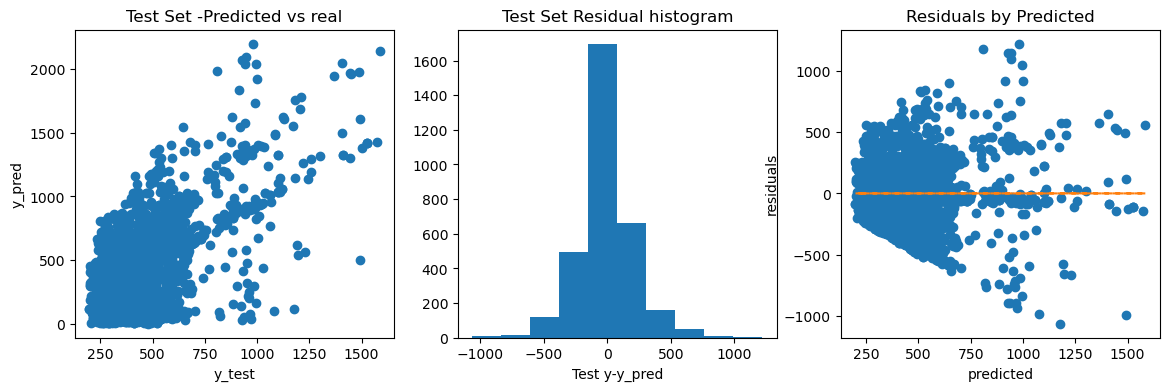

In [146]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')